In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PDF of Normal Distribution

Let $X$ be a random variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
$$

Let $X \sim \mathcal{N}(\mu, \sigma^2)$ denote that $X$ is drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$.




In [2]:
## Plotting the PDF

def plot_pdf_normal(mu, sigma):
    dist = torch.distributions.Normal(mu, sigma)
    x = torch.linspace(-10, 10, 1000)
    y = dist.log_prob(x).exp()
    plt.plot(x, y)
    plt.title(f"PDF N({mu}, {sigma})")
    


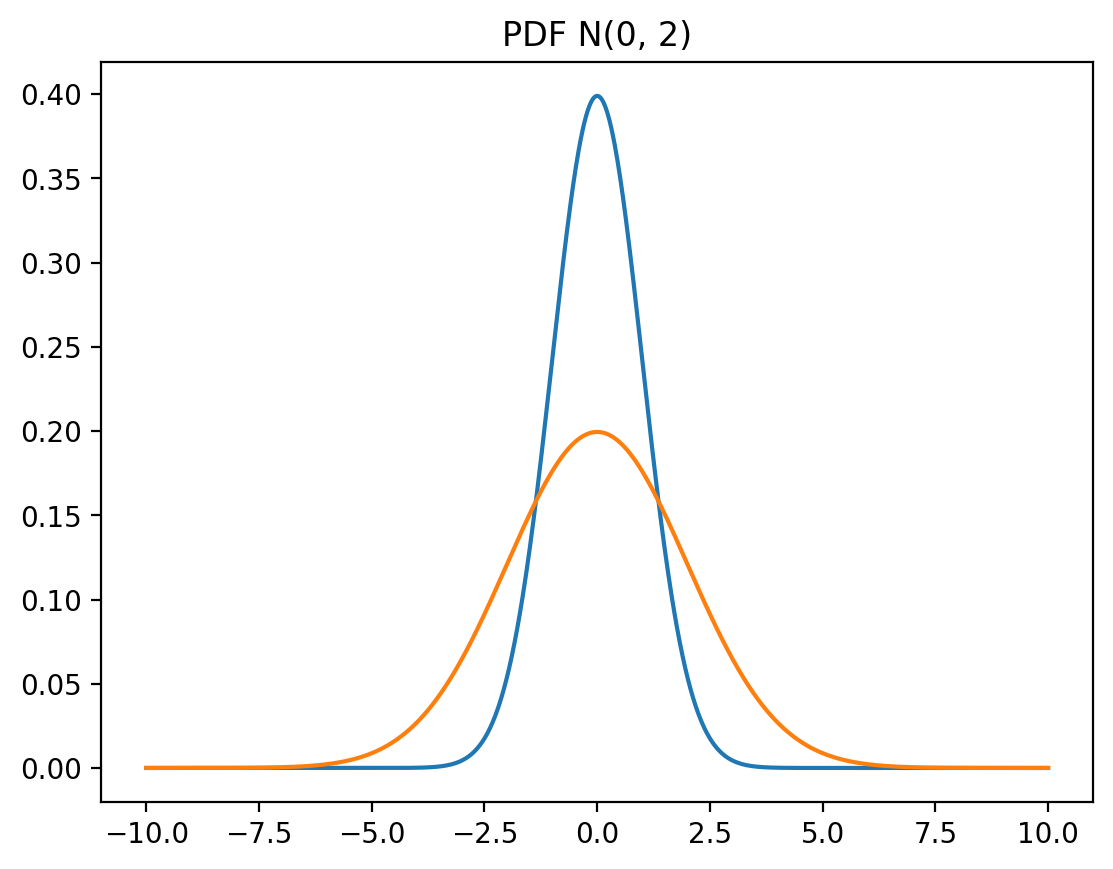

In [4]:
plot_pdf_normal(0, 1)
plot_pdf_normal(0, 2)

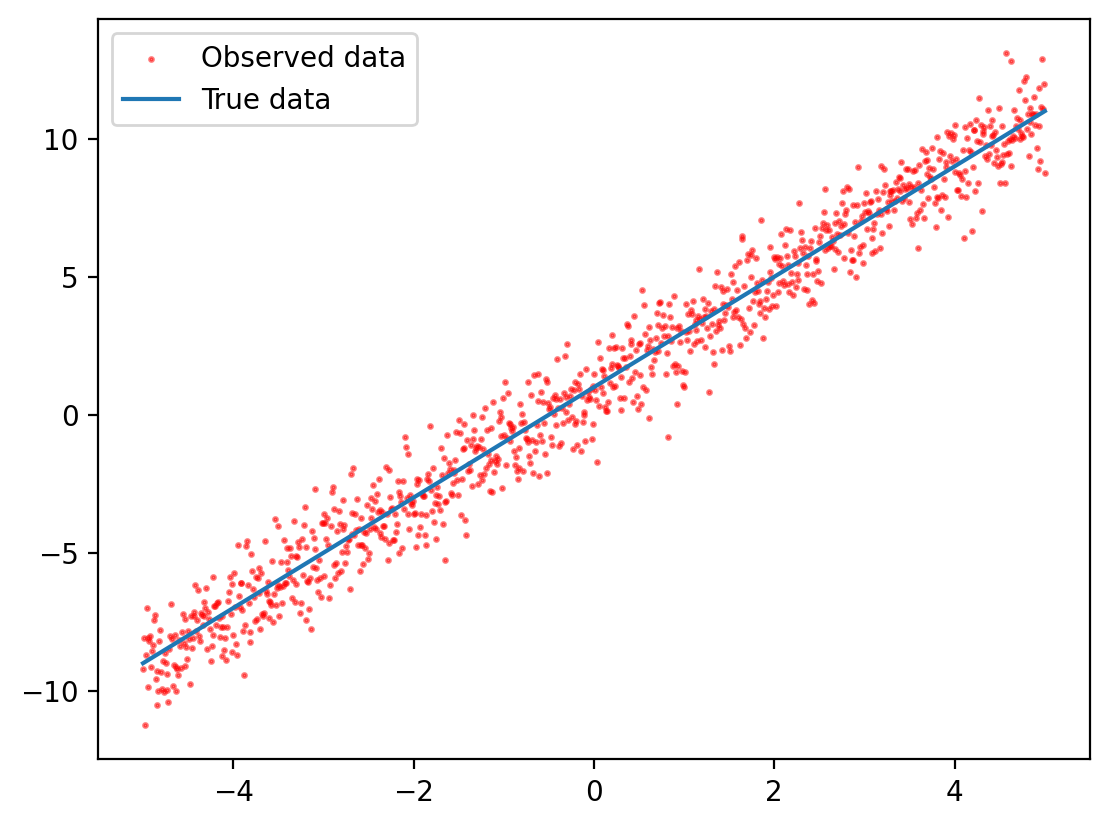

In [11]:
# Simulating data with normal distributed noise

x_true = torch.linspace(-5, 5, 1000)
y_true = 2 * x_true + 1
eps = torch.distributions.Normal(0, 1).sample(y_true.shape)
y_obs = y_true + eps

plt.scatter(x_true, y_obs, 
            label="Observed data", 
            marker='o', s=2,
            alpha = 0.5, color='red')
plt.plot(x_true, y_true, label="True data")
plt.legend()


### Heights and weights data

[Dataset link](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset)

The dataset contains 25,000 rows and 3 columns. Each row represents a person and the columns represent the person's index, height, and weight.

In [14]:
df = pd.read_html("http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html")

In [18]:
store_df = df[0]
store_df.columns = store_df.iloc[0]
store_df = store_df.iloc[1:]
store_df = store_df.astype(float)
store_df = store_df.drop(columns=["Index"])
store_df = store_df.dropna()

In [21]:
store_df.head()

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: ylabel='Density'>

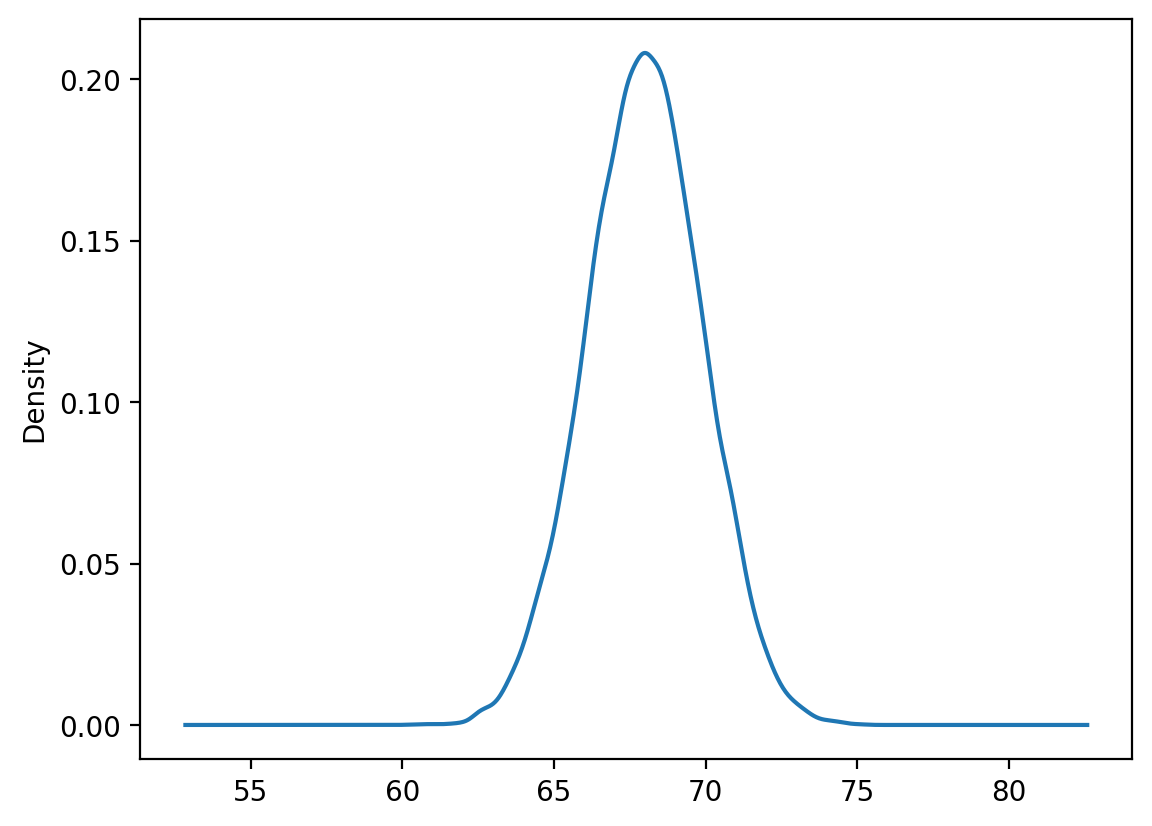

In [22]:
store_df["Height(Inches)"].plot(kind='density')

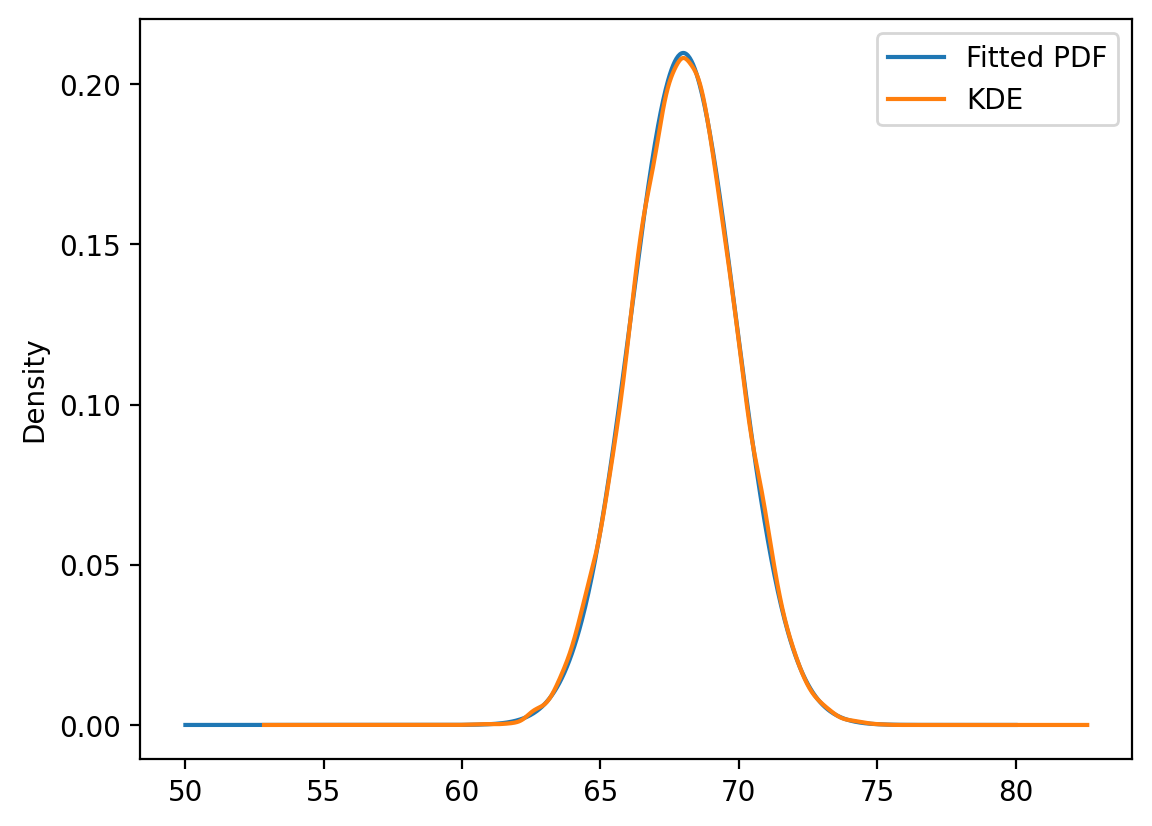

In [27]:
# Fit a normal distribution to the data
mu = store_df["Height(Inches)"].mean().item()
sigma = store_df["Height(Inches)"].std().item()

dist = torch.distributions.Normal(mu, sigma)
x = torch.linspace(50, 80, 1000)
y = dist.log_prob(x).exp()
plt.plot(x, y, label="Fitted PDF")

store_df["Height(Inches)"].plot(kind='density', label="KDE")
plt.legend()

<Axes: ylabel='Density'>

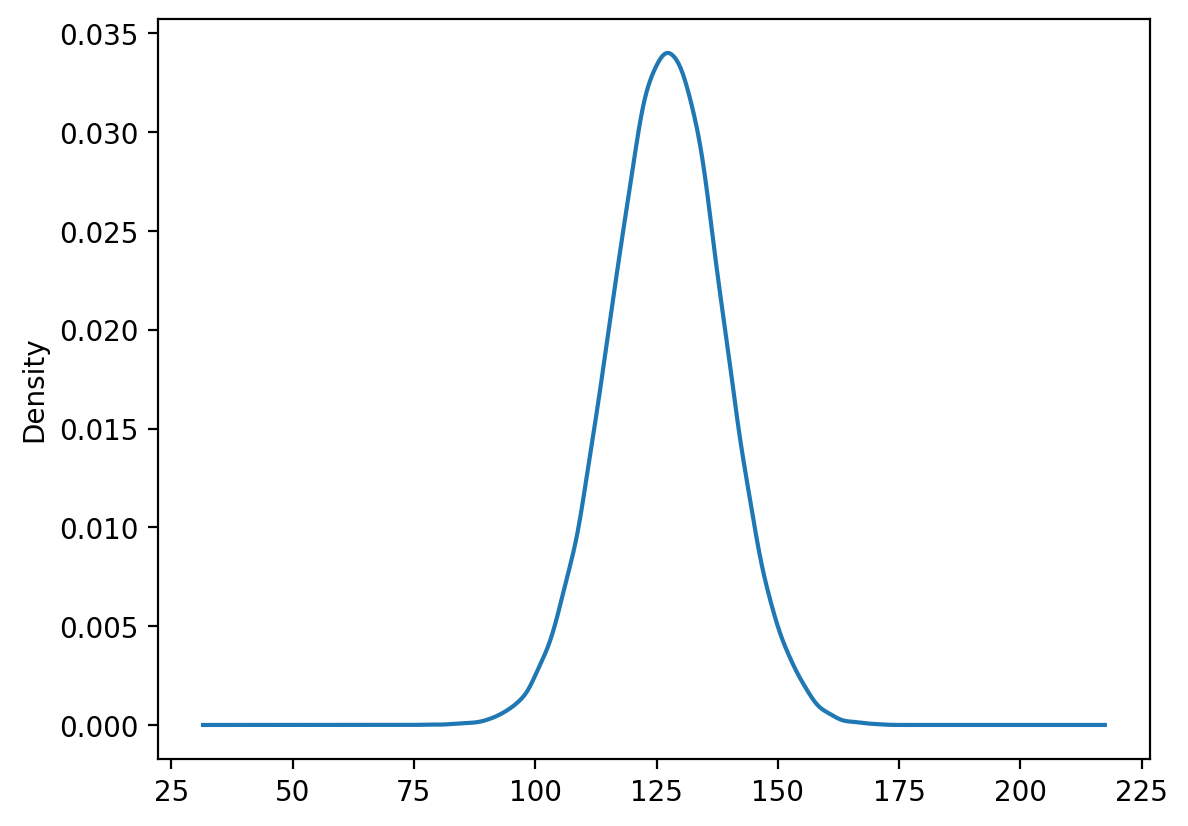

In [28]:
store_df["Weight(Pounds)"].plot(kind='density')

## Log Normal Distribution

Let $Y = \log(X)$, where $X \sim \mathcal{N}(\mu, \sigma^2)$. The PDF of $Y$ is given by:

$$
f_Y(y) = \frac{1}{y\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\log(y)-\mu)^2}{2\sigma^2}\right).

$$

Let $Y \sim \text{LogNormal}(\mu, \sigma^2)$ denote that $Y$ is drawn from a log-normal distribution with mean $\mu$ and variance $\sigma^2$.




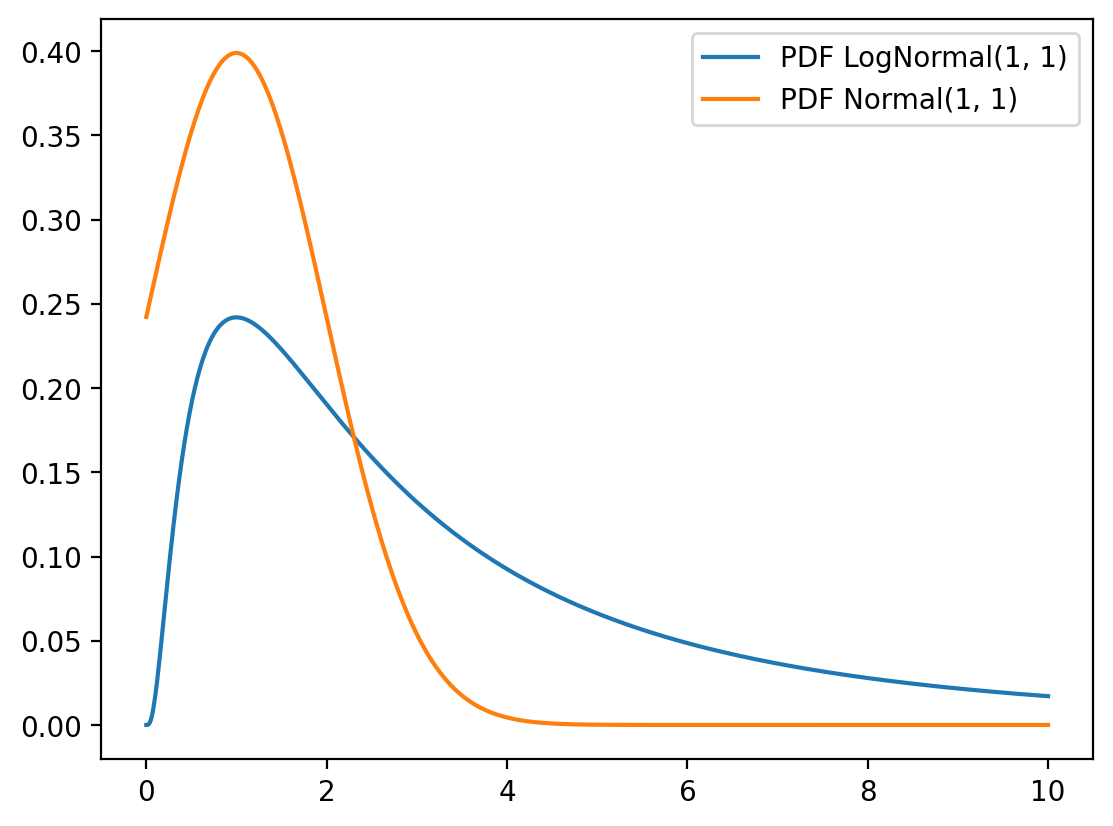

In [35]:
from cProfile import label


mu = 1.0
sigma = 1.0

log_normal = torch.distributions.LogNormal(mu, sigma)
x = torch.linspace(0.001, 10, 1000)
y = log_normal.log_prob(x).exp()
plt.plot(x, y, label="PDF LogNormal(1, 1)")

normal = torch.distributions.Normal(mu, sigma)
plt.plot(x, normal.log_prob(x).exp(), label="PDF Normal(1, 1)")

plt.legend()

